# RollingOrigin CV for political quarter (PQ-CV) split & holdout testing

This notebook tunes and selects best-performing models based on PQ-CV as described in the paper coupled to the code, relying on units of data in political quarters within election cycles. Best model configurations for all types are saved under ../results/tunings_RO_quarter, and holdout test performances of the best models are saved under ../results/fits_RO_quarter.

In [ ]:
directory_path = "/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/predicting_manifesto_alignment"

In [ ]:
# Get data
import pandas as pd

data_inc = pd.read_csv(f"{directory_path}/data/preprocessed/modelling_data/final/incomplete_dates_1997_2022.csv").drop(columns = ['Unnamed: 0'])
data_comp = pd.read_csv(f"{directory_path}/data/preprocessed/modelling_data/final/complete_dates_1997_2022.csv").drop(columns = ['Unnamed: 0'])

# Making columns year, month and day, quarter
data_inc['Date'] = pd.to_datetime(data_inc['Date'])
data_comp['Date'] = pd.to_datetime(data_comp['Date'])

data_inc['Year'] = data_inc['Date'].dt.year
data_inc['Month'] = data_inc['Date'].dt.month
data_inc['DayOfWeek'] = data_inc['Date'].dt.dayofweek  # Monday=0, Sunday=6
data_inc['Quarter'] = data_inc['Date'].dt.quarter

data_comp['Year'] = data_comp['Date'].dt.year
data_comp['Month'] = data_comp['Date'].dt.month
data_comp['DayOfWeek'] = data_comp['Date'].dt.dayofweek  # Monday=0, Sunday=6
data_comp['Quarter'] = data_comp['Date'].dt.quarter

# Replacing commas in the parlgov cols - theyre numeric vars
data_inc['left_right'] = data_inc['left_right'].str.replace(',', '.').astype('float')
data_comp['left_right'] = data_comp['left_right'].str.replace(',', '.').astype('float')

data_inc['liberty_authority'] = data_inc['liberty_authority'].str.replace(',', '.').astype('float')
data_comp['liberty_authority'] = data_comp['liberty_authority'].str.replace(',', '.').astype('float')

data_inc['eu_anti_pro'] = data_inc['eu_anti_pro'].str.replace(',', '.').astype('float')
data_comp['eu_anti_pro'] = data_comp['eu_anti_pro'].str.replace(',', '.').astype('float')

data_inc['state_market'] = data_inc['state_market'].str.replace(',', '.').astype('float')
data_comp['state_market'] = data_comp['state_market'].str.replace(',', '.').astype('float')
 
# Defining lection dates
election_dates = [
    pd.Timestamp('1994-09-21'),
    pd.Timestamp('1998-03-11'),
    pd.Timestamp('2001-11-20'),
    pd.Timestamp('2005-02-08'),
    pd.Timestamp('2007-11-13'),
    pd.Timestamp('2011-09-15'),
    pd.Timestamp('2015-06-18'),
    pd.Timestamp('2019-06-05'),
    pd.Timestamp('2022-11-01')  # Include this date even if unsure about data coverage
]

# Setting types for both dfs

# - CATEGORICAL
# Party names
data_inc['Party_Name'] = data_inc['Party_Name'].astype('category')
data_comp['Party_Name'] = data_comp['Party_Name'].astype('category')

# Government status
data_inc['government_status'] = data_inc['government_status'].astype('category')
data_comp['government_status'] = data_comp['government_status'].astype('category')
data_inc['government_status_finegrained'] = data_inc['government_status_finegrained'].astype('category')
data_comp['government_status_finegrained'] = data_comp['government_status_finegrained'].astype('category')

# Party Family
data_inc['family_name'] = data_inc['family_name'].astype('category')
data_comp['family_name'] = data_comp['family_name'].astype('category')


# - NUMERIC
# Days until / since
data_inc['days_until_election'] = pd.to_numeric(data_inc['days_until_election'], errors='coerce')
data_comp['days_until_election'] = pd.to_numeric(data_comp['days_until_election'], errors='coerce')

data_inc['days_since_election'] = pd.to_numeric(data_inc['days_since_election'], errors='coerce')
data_comp['days_since_election'] = pd.to_numeric(data_comp['days_since_election'], errors='coerce')

data_inc['days_until_election_2'] = pd.to_numeric(data_inc['days_until_election_2'], errors='coerce')
data_comp['days_until_election_2'] = pd.to_numeric(data_comp['days_until_election_2'], errors='coerce')

data_inc['days_since_election_2'] = pd.to_numeric(data_inc['days_since_election_2'], errors='coerce')
data_comp['days_since_election_2'] = pd.to_numeric(data_comp['days_since_election_2'], errors='coerce')

# Distances - raw
data_inc['euclidean_dist_from_dynamic'] = pd.to_numeric(data_inc['euclidean_dist_from_dynamic'], errors='coerce')
data_comp['euclidean_dist_from_dynamic'] = pd.to_numeric(data_comp['euclidean_dist_from_dynamic'], errors='coerce')

data_inc['euclidean_dist_to_dynamic'] = pd.to_numeric(data_inc['euclidean_dist_to_dynamic'], errors='coerce')
data_comp['euclidean_dist_to_dynamic'] = pd.to_numeric(data_comp['euclidean_dist_to_dynamic'], errors='coerce')

data_inc['cosine_similarity_from_dynamic'] = pd.to_numeric(data_inc['cosine_similarity_from_dynamic'], errors='coerce')
data_comp['cosine_similarity_from_dynamic'] = pd.to_numeric(data_comp['cosine_similarity_from_dynamic'], errors='coerce')

data_inc['cosine_similarity_to_dynamic'] = pd.to_numeric(data_inc['cosine_similarity_to_dynamic'], errors='coerce')
data_comp['cosine_similarity_to_dynamic'] = pd.to_numeric(data_comp['cosine_similarity_to_dynamic'], errors='coerce')

# Distances - pca
data_inc['euclidean_pca_dist_from_dynamic'] = pd.to_numeric(data_inc['euclidean_pca_dist_from_dynamic'], errors='coerce')
data_comp['euclidean_pca_dist_from_dynamic'] = pd.to_numeric(data_comp['euclidean_pca_dist_from_dynamic'], errors='coerce')

data_inc['euclidean_pca_dist_to_dynamic'] = pd.to_numeric(data_inc['euclidean_pca_dist_to_dynamic'], errors='coerce')
data_comp['euclidean_pca_dist_to_dynamic'] = pd.to_numeric(data_comp['euclidean_pca_dist_to_dynamic'], errors='coerce')


# Seats
data_inc['seats'] = pd.to_numeric(data_inc['seats'], errors='coerce')
data_comp['seats'] = pd.to_numeric(data_comp['seats'], errors='coerce')

# Misc
data_inc['left_right'] = pd.to_numeric(data_inc['left_right'], errors='coerce')
data_comp['left_right'] = pd.to_numeric(data_comp['left_right'], errors='coerce')

data_inc['liberty_authority'] = pd.to_numeric(data_inc['liberty_authority'], errors='coerce')
data_comp['liberty_authority'] = pd.to_numeric(data_comp['liberty_authority'], errors='coerce')

data_inc['eu_anti_pro'] = pd.to_numeric(data_inc['eu_anti_pro'], errors='coerce')
data_comp['eu_anti_pro'] = pd.to_numeric(data_comp['eu_anti_pro'], errors='coerce')

data_inc['state_market'] = pd.to_numeric(data_inc['state_market'], errors='coerce')
data_comp['state_market'] = pd.to_numeric(data_comp['state_market'], errors='coerce')

# See range
print("Euclidean range:")
print(min(data_inc['euclidean_dist_from_dynamic']))
print(max(data_inc['euclidean_dist_from_dynamic']))

print("Cosine range:")
print(min(data_inc['cosine_similarity_from_dynamic']))
print(max(data_inc['cosine_similarity_from_dynamic']))

# Subset for modelling
print("Subsetting for modelling...")

columns_to_include = [
    'Party_Name', 
    'government_status', 
    'government_status_finegrained', 
    'family_name',
    'days_until_election', 
    'days_since_election', 
    'days_until_election_2', 
    'days_since_election_2',
    'seats', 
    'left_right', 
    'liberty_authority', 
    'eu_anti_pro', 
    'state_market',

    'euclidean_dist_from_dynamic',
    'euclidean_dist_to_dynamic', 

    'euclidean_pca_dist_from_dynamic',
    'euclidean_pca_dist_to_dynamic',
    
    'cosine_similarity_from_dynamic',
    'cosine_similarity_to_dynamic',

    'Date',
    'Month',
    'Year',
    'DayOfWeek',
    'Quarter' # not the political quarter
]

data_inc_subset = data_inc[columns_to_include]
data_comp_subset = data_comp[columns_to_include]

# - Assigning political quarter numbers
# Defining 6 election cycles with start and end dates
election_cycles = [
    ('1998-03-12', '2001-11-20'),
    ('2001-11-21', '2005-02-08'),
    ('2005-02-09', '2007-11-13'),
    ('2007-11-14', '2011-09-15'),
    ('2011-09-16', '2015-06-18'),
    ('2015-06-19', '2019-06-05'),  # Holdout test set
]

# Convert election cycle dates to datetime objects
election_cycles_dt = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in election_cycles]

# Function to assign quarter number to each row
def assign_quarter_number(row):
    date = pd.to_datetime(row['Date'])
    for i, (start, end) in enumerate(election_cycles_dt, start=1):
        if start <= date <= end:
            cycle_duration = (end - start).days + 1  # Total days in the cycle
            days_passed = (date - start).days + 1    # Days passed since the start of the cycle
            quarter_num = int(days_passed / (cycle_duration / 4)) + 1
            return quarter_num if quarter_num <= 4 else quarter_num % 4
    return None  # If date doesn't fall within any election cycle

data_comp_subset['PolQuarter_numb'] = data_comp_subset.apply(assign_quarter_number, axis=1)
data_inc_subset['PolQuarter_numb'] = data_inc_subset.apply(assign_quarter_number, axis=1)

# Print unique pol quarters
print(data_comp_subset['PolQuarter_numb'].unique())
print(data_inc_subset['PolQuarter_numb'].unique())

# First: correcting this: replace 'minority government' with 'coalition' if any ones are still there
data_inc_subset['government_status'] = data_inc['government_status'].replace('minority government', 'coalition')
data_comp_subset['government_status'] = data_comp['government_status'].replace('minority government', 'coalition')

# Range of dates
print("Dates for complete dataset (all rows for all calendar days):")
print(min(data_comp_subset['Date']))
print(max(data_comp_subset['Date']))

print("Dates for incomplete dataset:")
print(min(data_inc_subset['Date']))
print(max(data_inc_subset['Date']))

import numpy as np
from scipy.stats import zscore

# Function to add z-score and absolute z-score columns and sort the df
def add_zscore_columns(df, column):
    # Calculate z-scores
    df['z_score'] = zscore(df[column], nan_policy='omit')
    # Calculate absolute z-scores
    df['abs_z_score'] = np.abs(df['z_score'])
    # Sort values by absolute z-score
    df = df.sort_values(by='abs_z_score', ascending=False)
    return df

# Apply the function to df
data_inc_subset = add_zscore_columns(data_inc_subset, 'euclidean_dist_from_dynamic')
data_comp_subset = add_zscore_columns(data_comp_subset, 'euclidean_dist_from_dynamic')

# Filter the df to keep rows where the absolute z-score is below or exactly 8
data_inc_subset = data_inc_subset[data_inc_subset['abs_z_score'] <= 8]
data_comp_subset = data_comp_subset[data_comp_subset['abs_z_score'] <= 8]

# See range
print("Euclidean range post outlier removal:")
print(min(data_inc_subset['euclidean_dist_from_dynamic']))
print(max(data_inc_subset['euclidean_dist_from_dynamic']))

print("Cosine range:")
print(min(data_inc_subset['cosine_similarity_from_dynamic']))
print(max(data_inc_subset['cosine_similarity_from_dynamic']))

# Take a look at one of them
data_inc_subset


# Rolling Origin: Political Quarter based (PQ-CV)

## Defining and preparing features (same pipeline as for EC-CV)

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ParameterGrid
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.callbacks import EarlyStopping

# Defining 6 election cycles with start and end dates
election_cycles = [
    ('1998-03-12', '2001-11-20'),
    ('2001-11-21', '2005-02-08'),
    ('2005-02-09', '2007-11-13'),
    ('2007-11-14', '2011-09-15'),
    ('2011-09-16', '2015-06-18'),
    ('2015-06-19', '2019-06-05'),  # Holdout test set
]

# Convert to datetime
election_cycles = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in election_cycles]

# Prepare the data by dropping NaNs
data_comp_subset_clean = data_comp_subset.dropna(subset=['euclidean_dist_from_dynamic'])
data_comp_subset_clean.reset_index(drop=True, inplace=True)

# Ensure data is sorted by Date
data_comp_subset_clean = data_comp_subset_clean.sort_values(by='Date')

# Define the start and end dates for delimiting the data
start_date = pd.Timestamp('1998-03-12') # FIRST CYCLE STARTS
end_date = pd.Timestamp('2019-06-05')   # LAST CYCLE ENDS

# Filter data to include only rows within the specified range
data_comp_subset_clean = data_comp_subset_clean[(data_comp_subset_clean['Date'] >= start_date) & (data_comp_subset_clean['Date'] <= end_date)]

data_comp_subset_clean.reset_index(drop=True, inplace=True)  


# Define the features and target
features = ['days_until_election',
            'days_since_election',
            'days_until_election_2',
            'days_since_election_2',

            'seats',
            'state_market',
            'government_status',
            'PolQuarter_numb',
            'block',
            'block'

            # -- Variables from ParlGov that are interesting, but not tested herein
            #'left_right',
            #'liberty_authority',
            #'eu_anti_pro',
            
            ]

# Defining the target
target = 'euclidean_dist_from_dynamic'

# One-hot encode categorical data
data_comp_subset_clean = pd.get_dummies(data_comp_subset_clean, columns=['government_status', 
                                                                         'PolQuarter_numb', 
                                                                         'block'], drop_first=False)

# Update features list after encoding
# Excluding some columns in the data that shouldn't be included in the flow from here
features = [col for col in data_comp_subset_clean.columns if col not in ['euclidean_dist_from_dynamic', 
                                                                         'Party_Name',
                                                                         'family_name',
                                                                         'government_status_finegrained', # Not testing due to too high imbalance across levels
                                                                         'Date',
                                                                         'Month', 
                                                                         'DayOfWeek', 
                                                                         'Year',
                                                                         'Quarter',

                                                                         'euclidean_dist_to_dynamic',
                                                                         'euclidean_pca_dist_from_dynamic',
                                                                         'euclidean_pca_dist_to_dynamic',
                                                                         'cosine_similarity_from_dynamic',
                                                                         'cosine_similarity_to_dynamic',
                                                                         'Sequential_Quarter',

                                                                        'z_score',
                                                                        'abs_z_score'
                                                                         ]]

# Convert any non-numeric columns to numeric
for feature in features:
    data_comp_subset_clean[feature] = pd.to_numeric(data_comp_subset_clean[feature], errors='coerce')

# Scale the features
scaler = StandardScaler()
data_comp_subset_clean[features] = scaler.fit_transform(data_comp_subset_clean[features])

# Take a look at what we have to use to predict alignment
features

## Modelling (PQ-CV) (not same pipeline as EC-CV)

Now that features are prepared, we can proceed with conducting the actual PQ-CV. The following is different from EC-CV in that PQ is not used as a feature but only as a splitter for the RO, see the Class RollingOriginQuarterCV.

In [ ]:
# -- Running PQ-CV, saving tunings

# Libraries load-in and setting random seed for replicability
import numpy as np
import random
import tensorflow as tf

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tqdm import tqdm
import os

# Function to plot training and validation metrics
def plot_training_validation(model_name, training_metrics, validation_metrics):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(training_metrics) + 1), training_metrics, label='Training RMSE')
    plt.plot(range(1, len(validation_metrics) + 1), validation_metrics, label='Validation RMSE')
    plt.title(f'Training and Validation RMSE for best {model_name}')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Convert to numpy arrays
X_full = data_comp_subset_clean[features].values
y = data_comp_subset_clean[target].values

# Function to split election cycles into quarters
def split_cycles_into_quarters(df, cycles):
    quarter_indices = []
    for cycle_start, cycle_end in cycles:
        cycle_data = df[(df['Date'] >= cycle_start) & (df['Date'] <= cycle_end)]
        if not cycle_data.empty:
            n = len(cycle_data)
            quarter_size = n // 4
            for i in range(4):
                start_idx = i * quarter_size
                end_idx = (i + 1) * quarter_size if i < 3 else n
                quarter_indices.append(cycle_data.index[start_idx:end_idx].tolist())
    return quarter_indices

# Generate indices for each quarter in each election cycle
quarters = split_cycles_into_quarters(data_comp_subset_clean, election_cycles[:-1])  # Exclude holdout test set (cycle 6)
holdout_quarters = split_cycles_into_quarters(data_comp_subset_clean, [election_cycles[-1]])  # Holdout test set (cycle 6)

# Generate indices for the holdout test set (cycle 6)
holdout_indices = split_cycles_into_quarters(data_comp_subset_clean, [election_cycles[-1]])[0]

# Custom cross-validation for rolling origin validation
class RollingOriginQuarterCV:
    def __init__(self, quarters):
        self.quarters = quarters

    def split(self, X, y=None, groups=None):
        for i in range(1, len(self.quarters)):
            train_idx = [idx for quarter in self.quarters[:i] for idx in quarter]
            val_idx = self.quarters[i]
            print(f"Training on quarters 1 to {i}, Validating on quarter {i + 1}")
            yield train_idx, val_idx

    def get_n_splits(self, X, y, groups=None):
        return len(self.quarters) - 1

# Function to create the LSTM model with dropout
def create_lstm_model(units=50, input_shape=(1, 1), dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to select a subset of features by name
def select_features_by_name(X, feature_names, all_feature_names):
    indices = [all_feature_names.index(name) for name in feature_names]
    return X[:, indices]

# Create the models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lr = LinearRegression()

# Perform hyperparameter tuning with custom CV
cv = RollingOriginQuarterCV(quarters)

# Function to calculate total combinations
def calculate_total_combinations(param_grid, feature_combinations):
    total_combinations = 1
    for key in param_grid:
        total_combinations *= len(param_grid[key])
    total_combinations *= len(feature_combinations)
    return total_combinations

feature_combinations = [
    ['days_since_election', 'seats'],
    ['days_since_election','seats', 'state_market'],
    ['seats','state_market','block_left','block_right'],
    ['days_since_election', 'seats','block_left','block_right','state_market'],
     ['days_until_election', 'seats','block_left','block_right','state_market'],
    ['days_since_election_2','seats','government_status_coalition', 'government_status_opposition', 'government_status_support'],#, 'PolQuarter_numb_1.0','PolQuarter_numb_2.0','PolQuarter_numb_3.0','PolQuarter_numb_4.0'],
    ['days_since_election','seats','government_status_coalition', 'government_status_opposition', 'government_status_support','block_left','block_right'],
    ['seats','government_status_coalition', 'government_status_opposition', 'government_status_support'],
    ['government_status_coalition', 'government_status_opposition', 'government_status_support'],
    ['seats','government_status_coalition', 'government_status_opposition', 'government_status_support','state_market'],
    ['government_status_coalition', 'government_status_opposition', 'government_status_support','block_left','block_right'],
    ['seats','government_status_coalition', 'government_status_opposition', 'government_status_support','block_left','block_right','state_market'],
]

# Define the parameter grid for each model (broad search spaces due to limited direct empirical evidence)
param_grid_rf = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_xgb = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [2, 5, 10, 15],
    'learning_rate': [0.002, 0.01, 0.02, 0.2]
}

param_grid_lstm = {
    'units': [5, 1],
    'epochs': [5, 10],
    'batch_size': [32, 64],
    'dropout_rate': [0.2, 0.5]
}

param_grid_lr = {
    'fit_intercept': [True, False]
}


# Function to tune and evaluate the model
def tune_model(model, param_grid, model_name, X, y, features, lstm=False):
    results = []
    all_models = []
    best_rmse = float('inf')
    best_params = {}
    best_model = None
    best_training_metrics = []
    best_validation_metrics = []
    best_training_mae = []
    best_validation_mae = []
    best_training_r2 = []
    best_validation_r2 = []

    total_combinations = calculate_total_combinations(param_grid, feature_combinations)
    combination_counter = 0

    with tqdm(total=total_combinations, desc=f"Tuning {model_name}") as pbar:
        for feature_subset in feature_combinations:
            X_subset = select_features_by_name(X, feature_subset, features)

            if lstm:
                for units in param_grid['units']:
                    for epochs in param_grid['epochs']:
                        for batch_size in param_grid['batch_size']:
                            for dropout_rate in param_grid['dropout_rate']:
                                print(f"Testing parameters: units={units}, epochs={epochs}, batch_size={batch_size}, dropout_rate={dropout_rate}, features={feature_subset}")
                                lstm_model = create_lstm_model(units=units, input_shape=(1, X_subset.shape[1]), dropout_rate=dropout_rate)
                                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                                lstm_train_rmse = []
                                lstm_val_rmse = []
                                lstm_train_mae = []
                                lstm_val_mae = []
                                lstm_train_r2 = []
                                lstm_val_r2 = []

                                for train_idx, val_idx in cv.split(X_subset):
                                    X_train, X_val = X_subset[train_idx], X_subset[val_idx]
                                    y_train, y_val = y[train_idx], y[val_idx]

                                    # Reshape data for LSTM
                                    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
                                    X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

                                    lstm_model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_reshaped, y_val), callbacks=[early_stopping], verbose=0)
                                    y_pred_train = lstm_model.predict(X_train_reshaped)
                                    y_pred_val = lstm_model.predict(X_val_reshaped)

                                    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
                                    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
                                    train_mae = mean_absolute_error(y_train, y_pred_train)
                                    val_mae = mean_absolute_error(y_val, y_pred_val)
                                    train_r2 = r2_score(y_train, y_pred_train)
                                    val_r2 = r2_score(y_val, y_pred_val)

                                    lstm_train_rmse.append(train_rmse)
                                    lstm_val_rmse.append(val_rmse)
                                    lstm_train_mae.append(train_mae)
                                    lstm_val_mae.append(val_mae)
                                    lstm_train_r2.append(train_r2)
                                    lstm_val_r2.append(val_r2)

                                    if val_rmse < best_rmse:
                                        best_rmse = val_rmse
                                        best_params = {'units': units, 'epochs': epochs, 'batch_size': batch_size, 'dropout_rate': dropout_rate}
                                        best_model = lstm_model
                                        best_training_metrics = lstm_train_rmse
                                        best_validation_metrics = lstm_val_rmse
                                        best_training_mae = lstm_train_mae
                                        best_validation_mae = lstm_val_mae
                                        best_training_r2 = lstm_train_r2
                                        best_validation_r2 = lstm_val_r2

                                model_metrics = {
                                    'Model': model_name,
                                    'Params': {'units': units, 'epochs': epochs, 'batch_size': batch_size, 'dropout_rate': dropout_rate},
                                    'MSE_val': best_rmse**2,
                                    'MAE_train': np.mean(lstm_train_mae),
                                    'MAE_val': np.mean(lstm_val_mae),
                                    'RMSE_train': np.mean(lstm_train_rmse),
                                    'RMSE_val': best_rmse,
                                    'R2_train': np.mean(lstm_train_r2),
                                    'R2_val': np.mean(lstm_val_r2),
                                    'feature_subset': feature_subset
                                }

                                all_models.append(model_metrics)
                                results.append((best_model, {**best_params, 'feature_subset': feature_subset}))
                                combination_counter += 1
                                pbar.update(1)

            else:
                for params in ParameterGrid(param_grid):
                    print(f"Testing parameters (not lstm): {params}, features={feature_subset}")
                    
                    # Collecting train and validation RMSE for each fold
                    train_rmse = []
                    val_rmse = []
                    train_mae = []
                    val_mae = []
                    train_r2 = []
                    val_r2 = []

                    for train_idx, val_idx in cv.split(X_subset):
                        model.set_params(**params)
                        model.fit(X_subset[train_idx], y[train_idx])
                        y_train_pred = model.predict(X_subset[train_idx])
                        y_val_pred = model.predict(X_subset[val_idx])

                        train_rmse.append(np.sqrt(mean_squared_error(y[train_idx], y_train_pred)))
                        val_rmse.append(np.sqrt(mean_squared_error(y[val_idx], y_val_pred)))
                        train_mae.append(mean_absolute_error(y[train_idx], y_train_pred))
                        val_mae.append(mean_absolute_error(y[val_idx], y_val_pred))
                        train_r2.append(r2_score(y[train_idx], y_train_pred))
                        val_r2.append(r2_score(y[val_idx], y_val_pred))

                    mean_train_rmse = np.mean(train_rmse)
                    mean_val_rmse = np.mean(val_rmse)
                    mean_train_mae = np.mean(train_mae)
                    mean_val_mae = np.mean(val_mae)
                    mean_train_r2 = np.mean(train_r2)
                    mean_val_r2 = np.mean(val_r2)

                    if mean_val_rmse < best_rmse:
                        best_rmse = mean_val_rmse
                        best_params = params
                        best_model = model
                        best_training_metrics = train_rmse
                        best_validation_metrics = val_rmse
                        best_training_mae = train_mae
                        best_validation_mae = val_mae
                        best_training_r2 = train_r2
                        best_validation_r2 = val_r2

                    model_metrics = {
                        'Model': model_name,
                        'Params': params,
                        'MSE_val': mean_val_rmse**2,
                        'MAE_train': mean_train_mae,
                        'MAE_val': mean_val_mae,
                        'RMSE_train': mean_train_rmse,
                        'RMSE_val': mean_val_rmse,
                        'R2_train': mean_train_r2,
                        'R2_val': mean_val_r2,
                        'feature_subset': feature_subset
                    }

                    all_models.append(model_metrics)
                    results.append((best_model, {**best_params, 'feature_subset': feature_subset}))
                    combination_counter += 1
                    pbar.update(1)

    return results, all_models, best_training_metrics, best_validation_metrics, best_training_mae, best_validation_mae, best_training_r2, best_validation_r2

# Ensure the /tunings directory exists
tunings_dir = f"{directory_path}/results/tunings_RO_quarter"

if not os.path.exists(tunings_dir):
    os.makedirs(tunings_dir)


print("Tuning RandomForest model...")
rf_results, rf_all_models, rf_best_training_metrics, rf_best_validation_metrics, rf_best_training_mae, rf_best_validation_mae, rf_best_training_r2, rf_best_validation_r2 = tune_model(rf, param_grid_rf, 'RandomForest', X_full, y, features)
pd.DataFrame(rf_all_models).to_csv(f"{tunings_dir}/rf_all_models.csv", index=False)
pd.DataFrame(rf_results).to_csv(f"{tunings_dir}/rf_results.csv", index=False)

print("Tuning XGBoost model...")
xgb_results, xgb_all_models, xgb_best_training_metrics, xgb_best_validation_metrics, xgb_best_training_mae, xgb_best_validation_mae, xgb_best_training_r2, xgb_best_validation_r2 = tune_model(xgb, param_grid_xgb, 'XGBoost', X_full, y, features)
pd.DataFrame(xgb_all_models).to_csv(f"{tunings_dir}/xgb_all_models.csv", index=False)
pd.DataFrame(xgb_results).to_csv(f"{tunings_dir}/xgb_results.csv", index=False)

print("Tuning LSTM model...")
lstm_results, lstm_all_models, lstm_best_training_metrics, lstm_best_validation_metrics, lstm_best_training_mae, lstm_best_validation_mae, lstm_best_training_r2, lstm_best_validation_r2 = tune_model(None, param_grid_lstm, 'LSTM', X_full, y, features, lstm=True)
pd.DataFrame(lstm_all_models).to_csv(f"{tunings_dir}/lstm_all_models.csv", index=False)
pd.DataFrame(lstm_results).to_csv(f"{tunings_dir}/lstm_results.csv", index=False)

print("Tuning LinearRegression model...")
lr_results, lr_all_models, lr_best_training_metrics, lr_best_validation_metrics, lr_best_training_mae, lr_best_validation_mae, lr_best_training_r2, lr_best_validation_r2 = tune_model(lr, param_grid_lr, 'LinearRegression', X_full, y, features)
pd.DataFrame(lr_all_models).to_csv(f"{tunings_dir}/lr_all_models.csv", index=False)
pd.DataFrame(lr_results).to_csv(f"{tunings_dir}/lr_results.csv", index=False)

## Plotting best models from PQ-CV performance across folds

Plotting best model's performance...


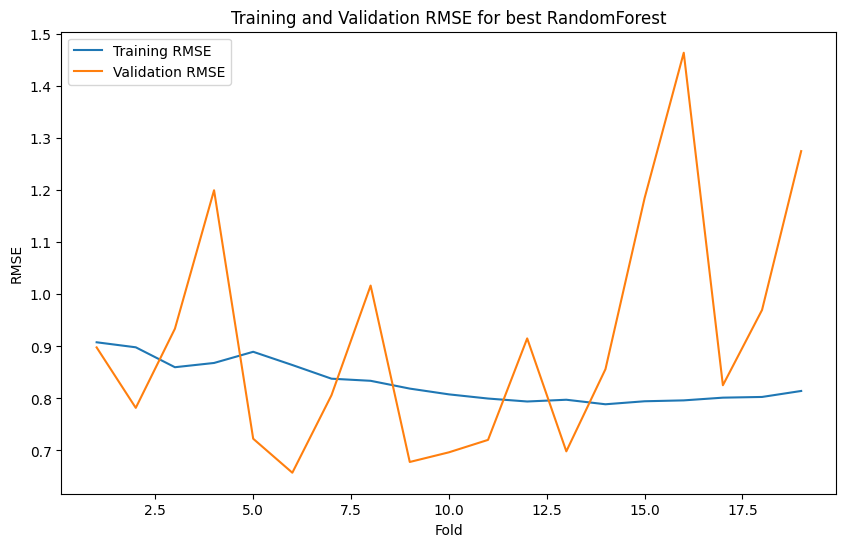

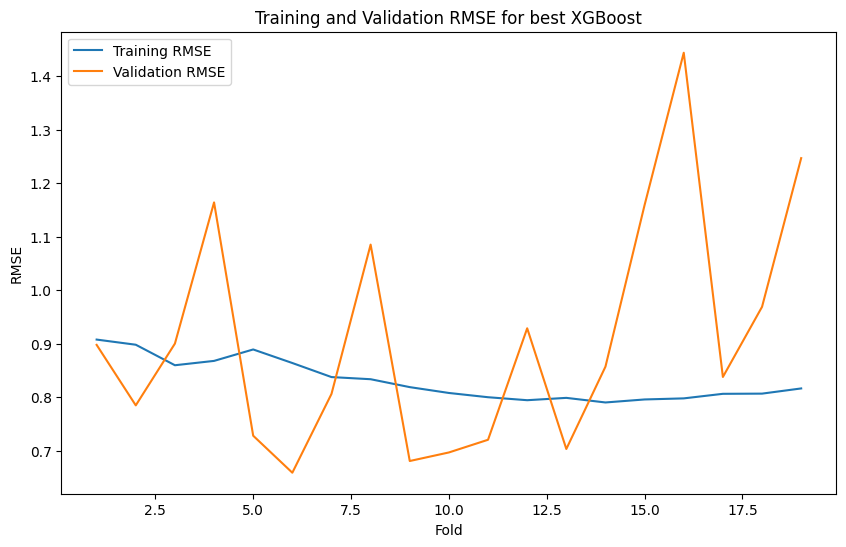

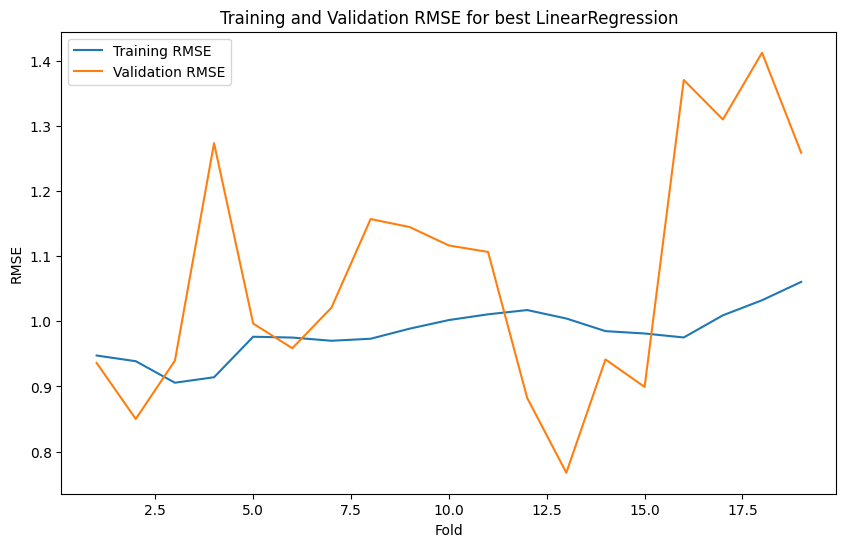

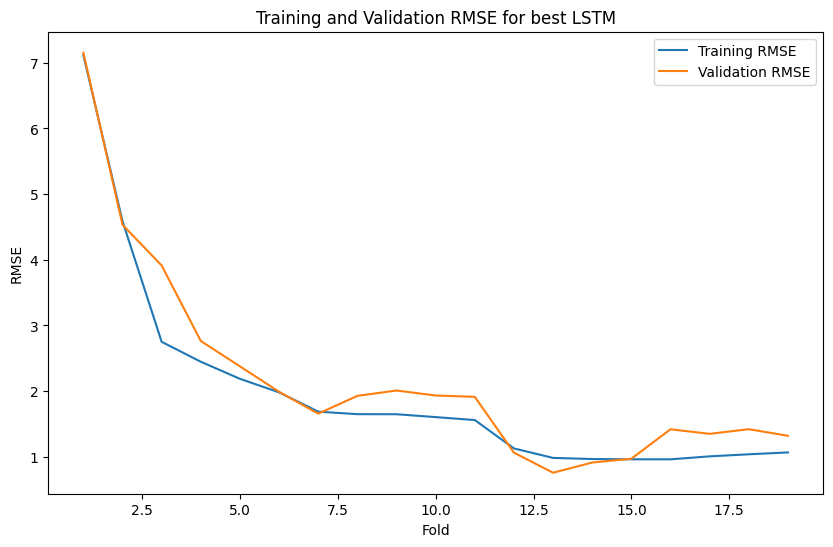

In [40]:
# Plotting the best model's performance across the folds
print("Plotting best model's performance...")
plot_training_validation('RandomForest', rf_best_training_metrics, rf_best_validation_metrics)
plot_training_validation('XGBoost', xgb_best_training_metrics, xgb_best_validation_metrics)
plot_training_validation('LinearRegression', lr_best_training_metrics, lr_best_validation_metrics)
plot_training_validation('LSTM', lstm_best_training_metrics, lstm_best_validation_metrics)

In [ ]:
# Combine all models into a df
all_models = rf_all_models + xgb_all_models + lstm_all_models + lr_all_models
all_models_df = pd.DataFrame(all_models)
all_models_df.to_csv(f"{tunings_dir}/all_models_df.csv", index=False)

# Extract best parameters
best_models_df = all_models_df.loc[all_models_df.groupby('Model')['RMSE_val'].idxmin()]
best_models_df.to_csv(f"{tunings_dir}/best_models_df.csv")

In [39]:
best_rf_params = best_models_df[best_models_df['Model'] == 'RandomForest']['Params'].values[0]
best_xgb_params = best_models_df[best_models_df['Model'] == 'XGBoost']['Params'].values[0]
best_lr_params = best_models_df[best_models_df['Model'] == 'LinearRegression']['Params'].values[0]
best_lstm_params = best_models_df[best_models_df['Model'] == 'LSTM']['Params'].values[0]

best_rf_feature_subset = best_models_df[best_models_df['Model'] == 'RandomForest']['feature_subset'].values[0]
best_xgb_feature_subset = best_models_df[best_models_df['Model'] == 'XGBoost']['feature_subset'].values[0]
best_lr_feature_subset = best_models_df[best_models_df['Model'] == 'LinearRegression']['feature_subset'].values[0]
best_lstm_feature_subset = best_models_df[best_models_df['Model'] == 'LSTM']['feature_subset'].values[0]

# Function to retrain the best model
def retrain_model(model, params, feature_subset, X, y, model_name, lstm=False):
    X_subset = select_features_by_name(X, feature_subset, features)
    if lstm:
        X_reshaped = X_subset.reshape((X_subset.shape[0], 1, X_subset.shape[1]))
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lstm_model = create_lstm_model(units=params['units'], input_shape=(1, X_reshaped.shape[2]), dropout_rate=params['dropout_rate'])
        lstm_model.fit(X_reshaped, y, epochs=params['epochs'], batch_size=params['batch_size'], callbacks=[early_stopping], verbose=0)
        return lstm_model
    else:
        model.set_params(**params)
        model.fit(X_subset, y)
        return model

# Retrain the best models using quarters from cycles 1-5
train_indices = np.concatenate(quarters[:20])  # Use quarters from cycles 1 to 5 for training
X_train = X_full[train_indices]
y_train = y[train_indices]

print("Retraining the best RandomForest model...")
best_rf_retrained = retrain_model(RandomForestRegressor(random_state=42), best_rf_params, best_rf_feature_subset, X_train, y_train, 'RandomForest')

print("Retraining the best XGBoost model...")
best_xgb_retrained = retrain_model(XGBRegressor(random_state=42), best_xgb_params, best_xgb_feature_subset, X_train, y_train, 'XGBoost')

print("Retraining the best LinearRegression model...")
best_lr_retrained = retrain_model(LinearRegression(), best_lr_params, best_lr_feature_subset, X_train, y_train, 'LinearRegression')

print("Retraining the best LSTM model...")
best_lstm_retrained = retrain_model(None, best_lstm_params, best_lstm_feature_subset, X_train, y_train, 'LSTM', lstm=True)

# Function to evaluate model on holdout test set (cycle 6)
def evaluate_best_model(model, model_name, X_holdout, y_holdout, feature_subset, params, evaluation_set, quarter):
    if model_name == 'Mean':
        y_pred_holdout = [model] * len(y_holdout)
    else:
        X_holdout_subset = select_features_by_name(X_holdout, feature_subset, features)
        if model_name == 'LSTM':
            X_holdout_lstm = X_holdout_subset.reshape((X_holdout_subset.shape[0], 1, X_holdout_subset.shape[1]))
            y_pred_holdout = model.predict(X_holdout_lstm)
        else:
            y_pred_holdout = model.predict(X_holdout_subset)
    
    mse = mean_squared_error(y_holdout, y_pred_holdout)
    mae = mean_absolute_error(y_holdout, y_pred_holdout)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_holdout, y_pred_holdout)
    
    metrics = {
        'Model': model_name,
        'Evaluation_Set': evaluation_set,
        'Quarter': quarter,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Params': params,
        'Feature_Subset': feature_subset
    }
    
    return metrics

# Evaluate the best models on each quarter of the holdout test set (each PQ of cycle 6)
metrics = []
for i, holdout_quarter in enumerate(holdout_quarters):
    X_holdout_quarter = X_full[holdout_quarter]
    y_holdout_quarter = y[holdout_quarter]
    metrics.append(evaluate_best_model(best_rf_retrained, 'RandomForest', X_holdout_quarter, y_holdout_quarter, best_rf_feature_subset, best_rf_params, f'Holdout Quarter {i+1}', i))
    metrics.append(evaluate_best_model(best_xgb_retrained, 'XGBoost', X_holdout_quarter, y_holdout_quarter, best_xgb_feature_subset, best_xgb_params, f'Holdout Quarter {i+1}', i))
    metrics.append(evaluate_best_model(best_lr_retrained, 'LinearRegression', X_holdout_quarter, y_holdout_quarter, best_lr_feature_subset, best_lr_params, f'Holdout Quarter {i+1}', i))
    metrics.append(evaluate_best_model(best_lstm_retrained, 'LSTM', X_holdout_quarter, y_holdout_quarter, best_lstm_feature_subset, best_lstm_params, f'Holdout Quarter {i+1}', i))
    mean_prediction = np.mean(y_holdout_quarter)
    metrics.append(evaluate_best_model(mean_prediction, 'Mean', X_holdout_quarter, y_holdout_quarter, 'N/A', 'N/A', f'Holdout Quarter {i+1}', i))

# Evaluate the best models on the entire holdout test set (cycle 6) by concatenating holdout quarters
holdout_indices = np.concatenate(holdout_quarters)
X_holdout = X_full[holdout_indices]
y_holdout = y[holdout_indices]
metrics.append(evaluate_best_model(best_rf_retrained, 'RandomForest', X_holdout, y_holdout, best_rf_feature_subset, best_rf_params, 'Holdout Cycle', 'Whole cycle'))
metrics.append(evaluate_best_model(best_xgb_retrained, 'XGBoost', X_holdout, y_holdout, best_xgb_feature_subset, best_xgb_params, 'Holdout Cycle', 'Whole cycle'))
metrics.append(evaluate_best_model(best_lr_retrained, 'LinearRegression', X_holdout, y_holdout, best_lr_feature_subset, best_lr_params, 'Holdout Cycle', 'Whole cycle'))
metrics.append(evaluate_best_model(best_lstm_retrained, 'LSTM', X_holdout, y_holdout, best_lstm_feature_subset, best_lstm_params, 'Holdout Cycle', 'Whole cycle'))
mean_prediction = np.mean(y_holdout)
metrics.append(evaluate_best_model(mean_prediction, 'Mean', X_holdout, y_holdout, 'N/A', 'N/A', 'Holdout Cycle', 'Whole cycle'))

# Convert metrics to df and display
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by=['RMSE'])
print("Holdout Test Set Metrics")

# Ensure the /fits_RO_quarter directory exists
fits_dir = f"{directory_path}'fits_RO_quarter"

if not os.path.exists(fits_dir):
    os.makedirs(fits_dir)

metrics_df.to_csv(f"{fits_dir}/metrics_df.csv", index=False)

print("Evaluation completed and metrics saved.")

# Take a look
metrics_df


Retraining the best RandomForest model...
Retraining the best XGBoost model...
Retraining the best LinearRegression model...
Retraining the best LSTM model...


/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/DS_EXAM_BACKUP/politicians_not_people_env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/pbrams/Desktop/AARHUS_UNIVERSITY/kandidat/data_sci/data_sci_project/DS_EXAM_BACKUP/politicians_not_people_env/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Holdout Test Set Metrics
Evaluation completed and metrics saved.


,Model,Evaluation_Set,Quarter,MSE,MAE,RMSE,R2,Params,Feature_Subset
1,XGBoost,Holdout Quarter 1,0,1.831794,1.075265,1.353438,0.161160,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...","[seats, government_status_coalition, governmen..."
6,XGBoost,Holdout Quarter 2,1,1.886734,1.114575,1.373584,0.121337,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...","[seats, government_status_coalition, governmen..."
7,LinearRegression,Holdout Quarter 2,1,1.899108,1.098287,1.378081,0.115574,{'fit_intercept': True},"[days_since_election, seats, block_left, block..."
2,LinearRegression,Holdout Quarter 1,0,1.950085,1.099103,1.396455,0.106990,{'fit_intercept': True},"[days_since_election, seats, block_left, block..."
0,RandomForest,Holdout Quarter 1,0,1.961401,1.144904,1.400500,0.101808,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","[seats, government_status_coalition, governmen..."
11,XGBoost,Holdout Quarter 3,2,1.991609,1.148556,1.411244,0.086496,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...","[seats, government_status_coalition, governmen..."
12,LinearRegression,Holdout Quarter 3,2,2.007135,1.135883,1.416734,0.079375,{'fit_intercept': True},"[days_since_election, seats, block_left, block..."
21,XGBoost,Holdout Cycle,Whole cycle,2.051943,1.141858,1.432461,0.089640,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...","[seats, government_status_coalition, governmen..."
22,LinearRegression,Holdout Cycle,Whole cycle,2.062132,1.124302,1.436012,0.085119,{'fit_intercept': True},"[days_since_election, seats, block_left, block..."
5,RandomForest,Holdout Quarter 2,1,2.074420,1.181209,1.440285,0.033930,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","[seats, government_status_coalition, governmen..."


## Predictions and Residual Plots

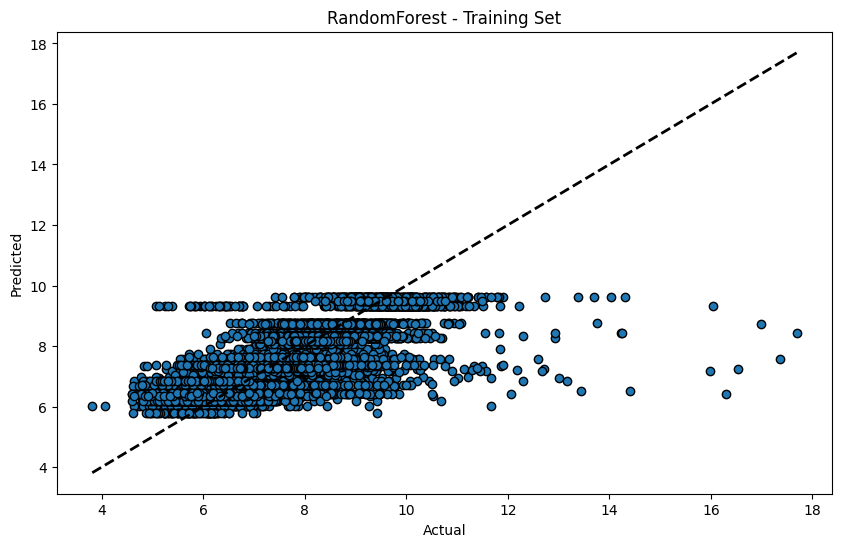

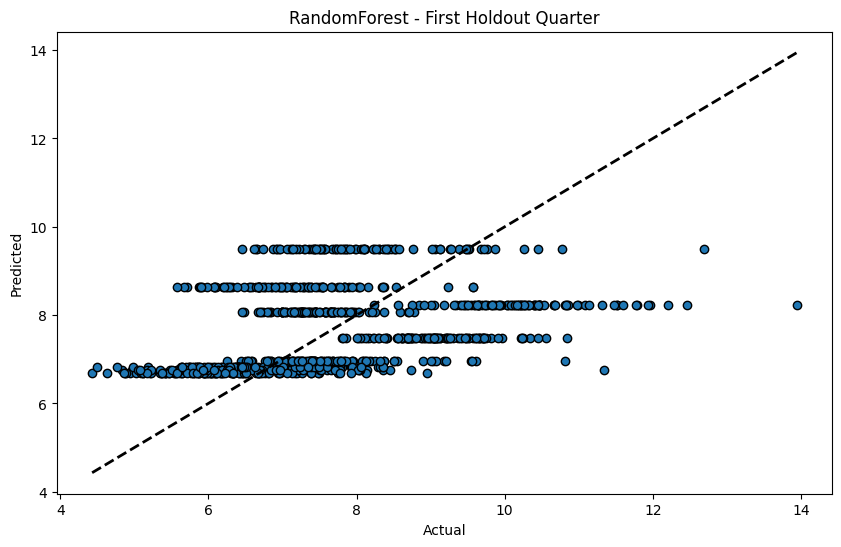

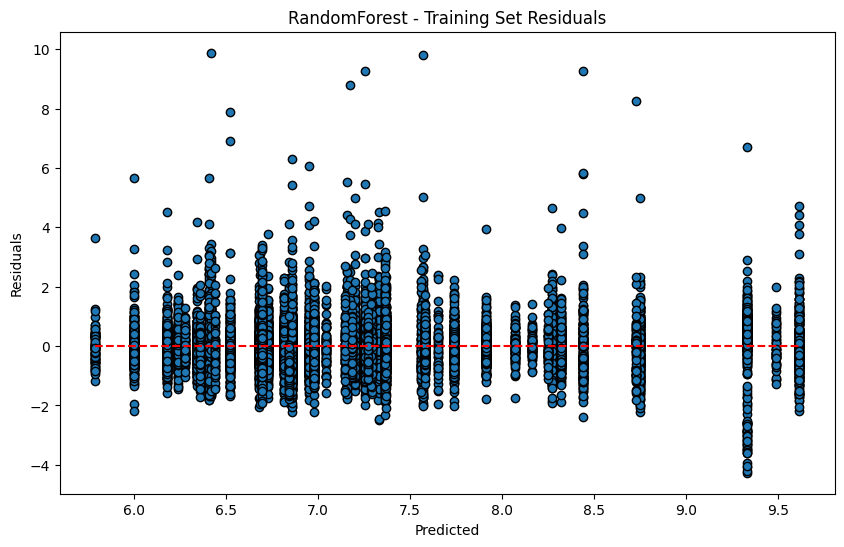

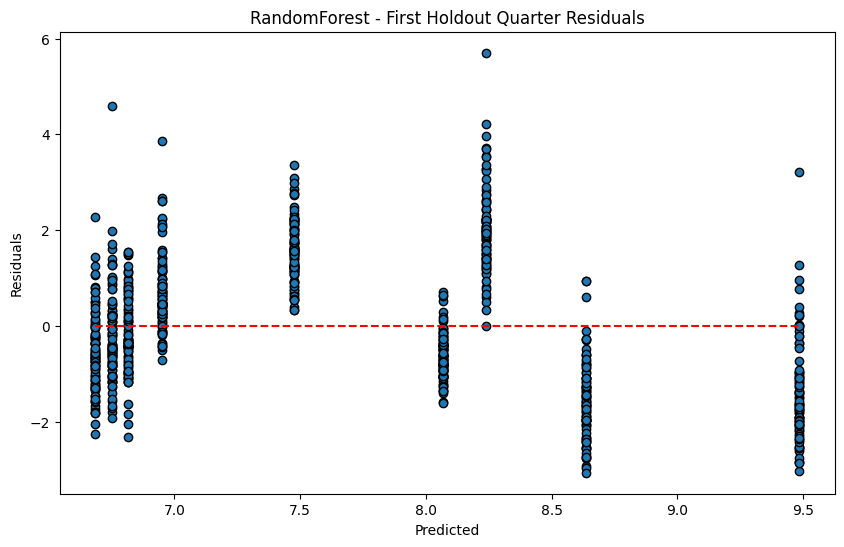

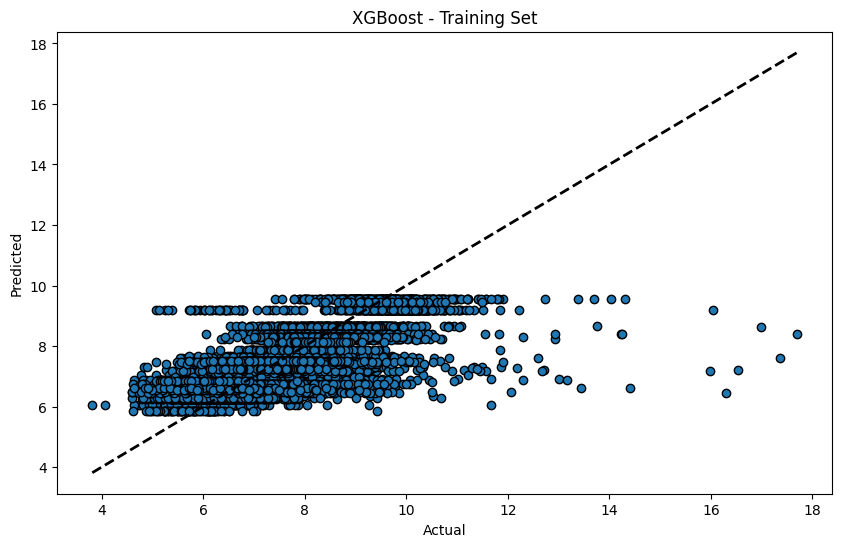

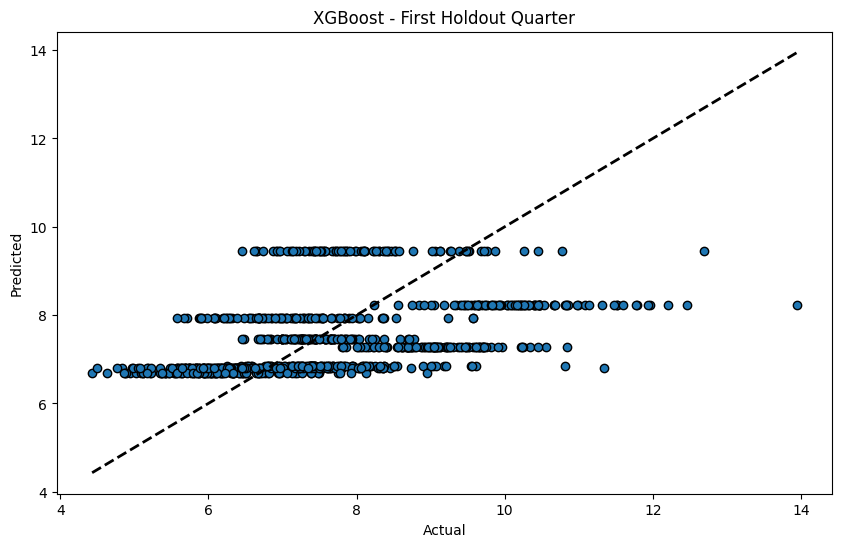

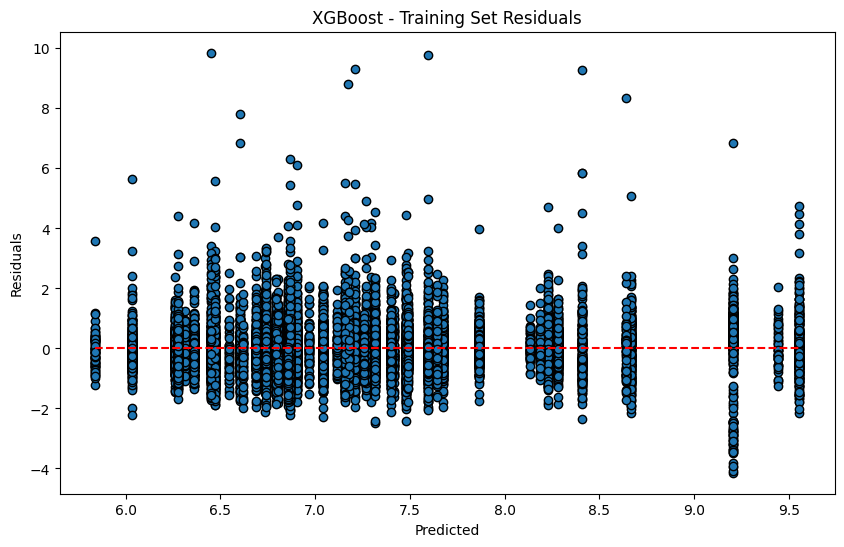

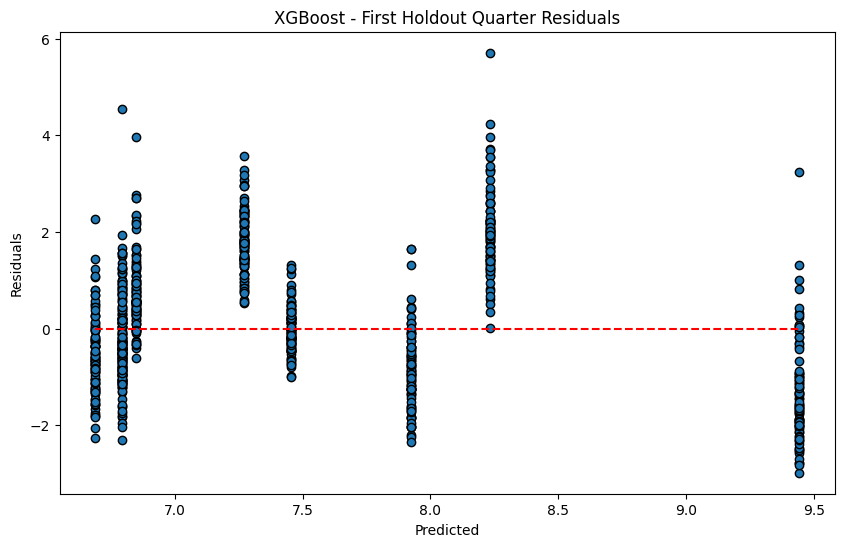

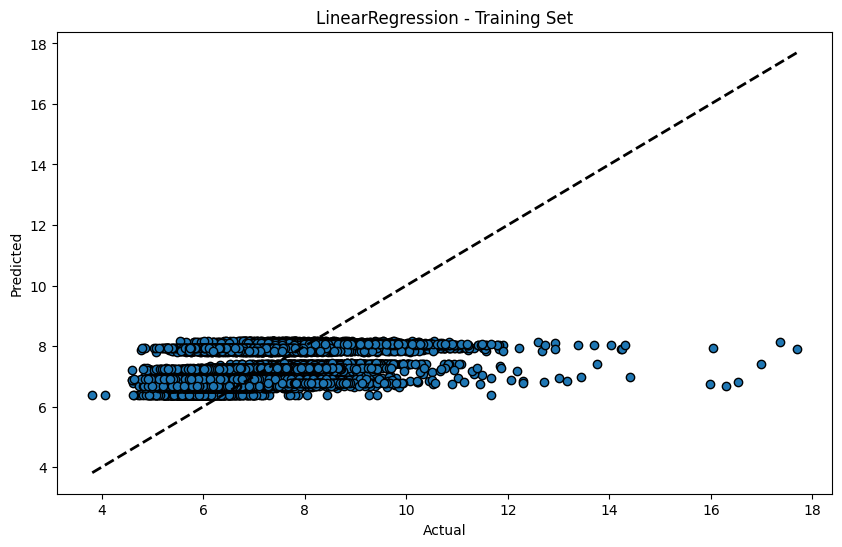

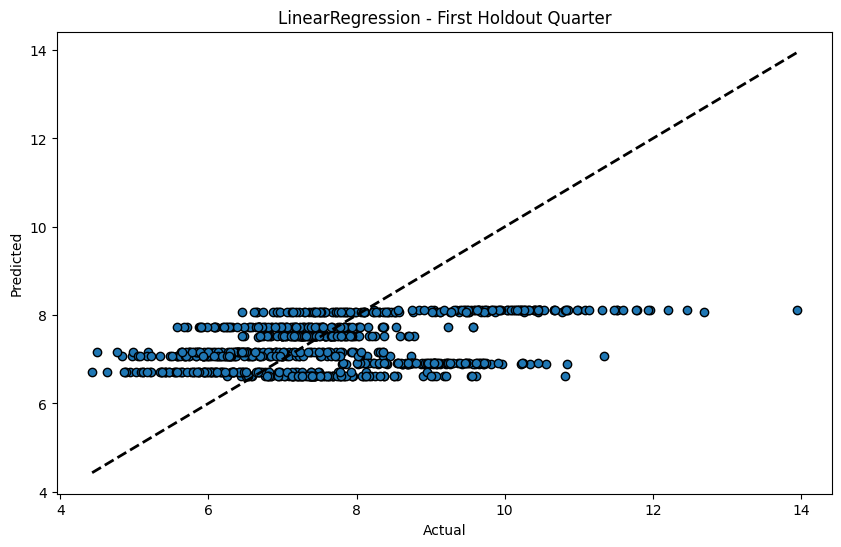

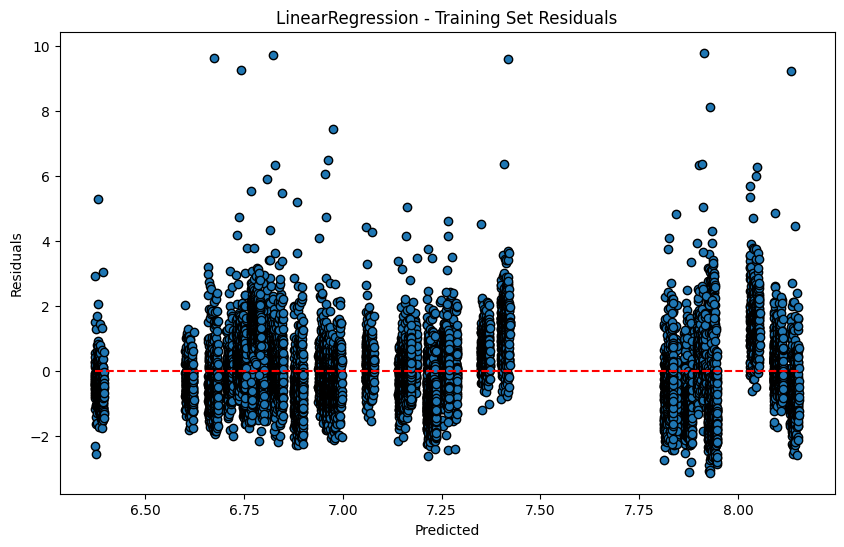

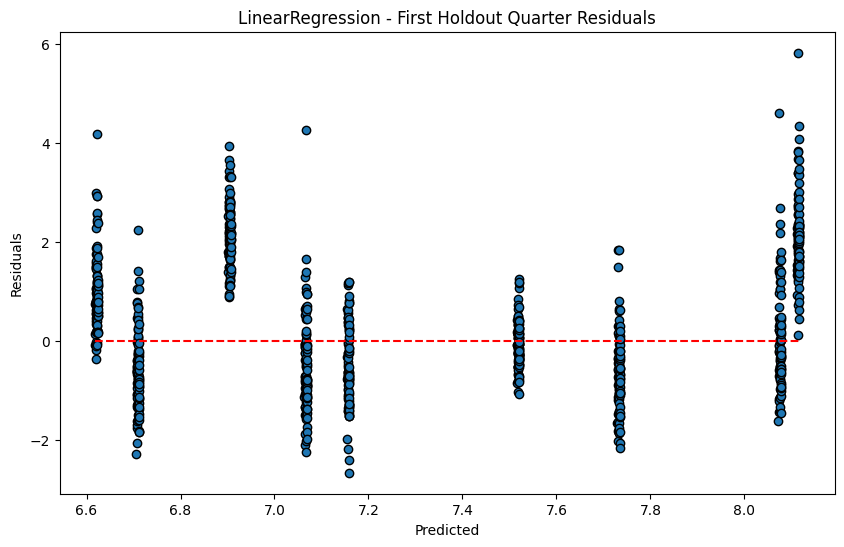

386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


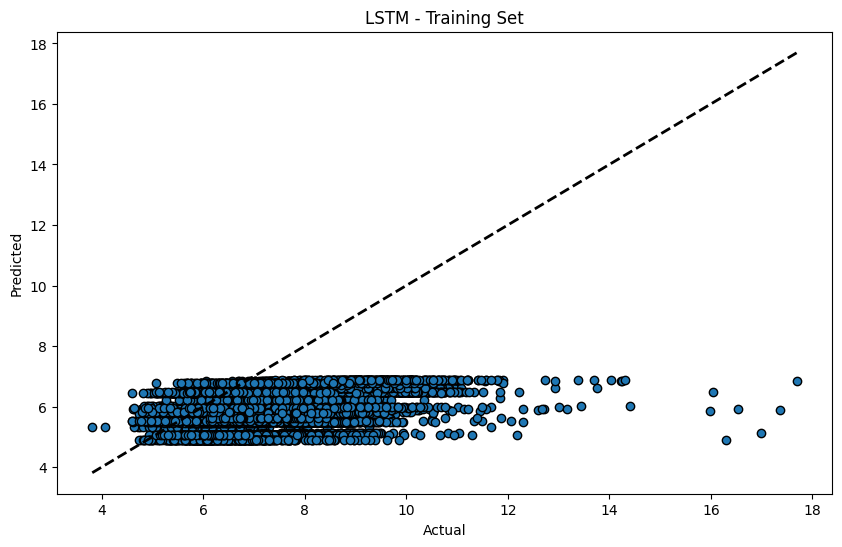

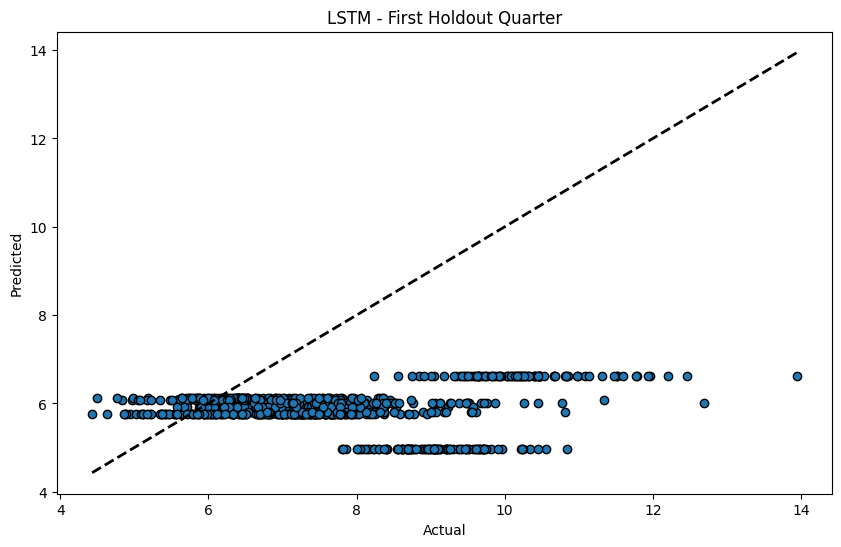

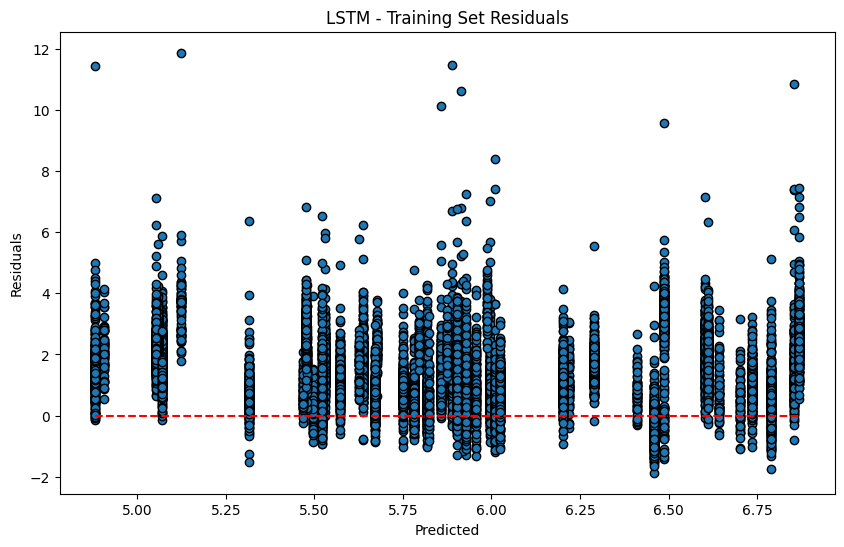

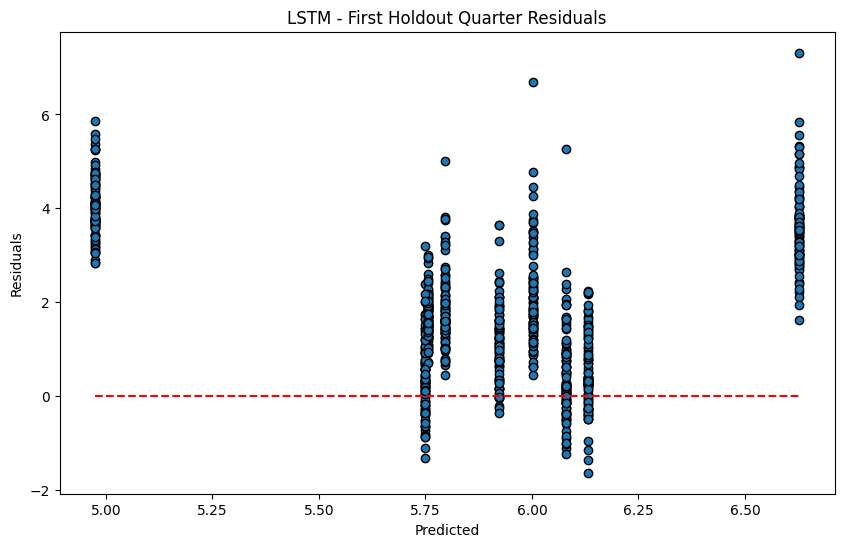

In [41]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_predictions(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Function to plot residuals
def plot_residuals(y_actual, y_pred, title):
    residuals = y_actual - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

# Select the first holdout quarter
first_holdout_quarter = holdout_quarters[0]
X_holdout_quarter = X_full[first_holdout_quarter]
y_holdout_quarter = y[first_holdout_quarter]

# Select the correct subset of features for each model
X_train_rf = select_features_by_name(X_full[train_indices], best_rf_feature_subset, features)
X_holdout_quarter_rf = select_features_by_name(X_holdout_quarter, best_rf_feature_subset, features)

X_train_xgb = select_features_by_name(X_full[train_indices], best_xgb_feature_subset, features)
X_holdout_quarter_xgb = select_features_by_name(X_holdout_quarter, best_xgb_feature_subset, features)

X_train_lr = select_features_by_name(X_full[train_indices], best_lr_feature_subset, features)
X_holdout_quarter_lr = select_features_by_name(X_holdout_quarter, best_lr_feature_subset, features)

X_train_lstm = select_features_by_name(X_full[train_indices], best_lstm_feature_subset, features)
X_holdout_quarter_lstm = select_features_by_name(X_holdout_quarter, best_lstm_feature_subset, features)

# Function to ensure predictions are reshaped correctly
def reshape_lstm_predictions(y_pred):
    return y_pred.flatten()

# Inspect RandomForest model predictions for the first quarter
y_pred_train_rf = best_rf_retrained.predict(X_train_rf)
y_pred_holdout_quarter_rf = best_rf_retrained.predict(X_holdout_quarter_rf)

plot_predictions(y_train, y_pred_train_rf, 'RandomForest - Training Set')
plot_predictions(y_holdout_quarter, y_pred_holdout_quarter_rf, 'RandomForest - First Holdout Quarter')

plot_residuals(y_train, y_pred_train_rf, 'RandomForest - Training Set Residuals')
plot_residuals(y_holdout_quarter, y_pred_holdout_quarter_rf, 'RandomForest - First Holdout Quarter Residuals')

# Inspect XGBoost model predictions for the first quarter
y_pred_train_xgb = best_xgb_retrained.predict(X_train_xgb)
y_pred_holdout_quarter_xgb = best_xgb_retrained.predict(X_holdout_quarter_xgb)

plot_predictions(y_train, y_pred_train_xgb, 'XGBoost - Training Set')
plot_predictions(y_holdout_quarter, y_pred_holdout_quarter_xgb, 'XGBoost - First Holdout Quarter')

plot_residuals(y_train, y_pred_train_xgb, 'XGBoost - Training Set Residuals')
plot_residuals(y_holdout_quarter, y_pred_holdout_quarter_xgb, 'XGBoost - First Holdout Quarter Residuals')

# Inspect LinearRegression model predictions for the first quarter
y_pred_train_lr = best_lr_retrained.predict(X_train_lr)
y_pred_holdout_quarter_lr = best_lr_retrained.predict(X_holdout_quarter_lr)

plot_predictions(y_train, y_pred_train_lr, 'LinearRegression - Training Set')
plot_predictions(y_holdout_quarter, y_pred_holdout_quarter_lr, 'LinearRegression - First Holdout Quarter')

plot_residuals(y_train, y_pred_train_lr, 'LinearRegression - Training Set Residuals')
plot_residuals(y_holdout_quarter, y_pred_holdout_quarter_lr, 'LinearRegression - First Holdout Quarter Residuals')

# Inspect LSTM model predictions for the first quarter
X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_holdout_quarter_lstm_reshaped = X_holdout_quarter_lstm.reshape((X_holdout_quarter_lstm.shape[0], 1, X_holdout_quarter_lstm.shape[1]))

y_pred_train_lstm = best_lstm_retrained.predict(X_train_lstm_reshaped)
y_pred_holdout_quarter_lstm = best_lstm_retrained.predict(X_holdout_quarter_lstm_reshaped)

# Ensure LSTM predictions are reshaped correctly
y_pred_train_lstm = reshape_lstm_predictions(y_pred_train_lstm)
y_pred_holdout_quarter_lstm = reshape_lstm_predictions(y_pred_holdout_quarter_lstm)

plot_predictions(y_train, y_pred_train_lstm, 'LSTM - Training Set')
plot_predictions(y_holdout_quarter, y_pred_holdout_quarter_lstm, 'LSTM - First Holdout Quarter')

plot_residuals(y_train, y_pred_train_lstm, 'LSTM - Training Set Residuals')
plot_residuals(y_holdout_quarter, y_pred_holdout_quarter_lstm, 'LSTM - First Holdout Quarter Residuals')


## Feature Importance

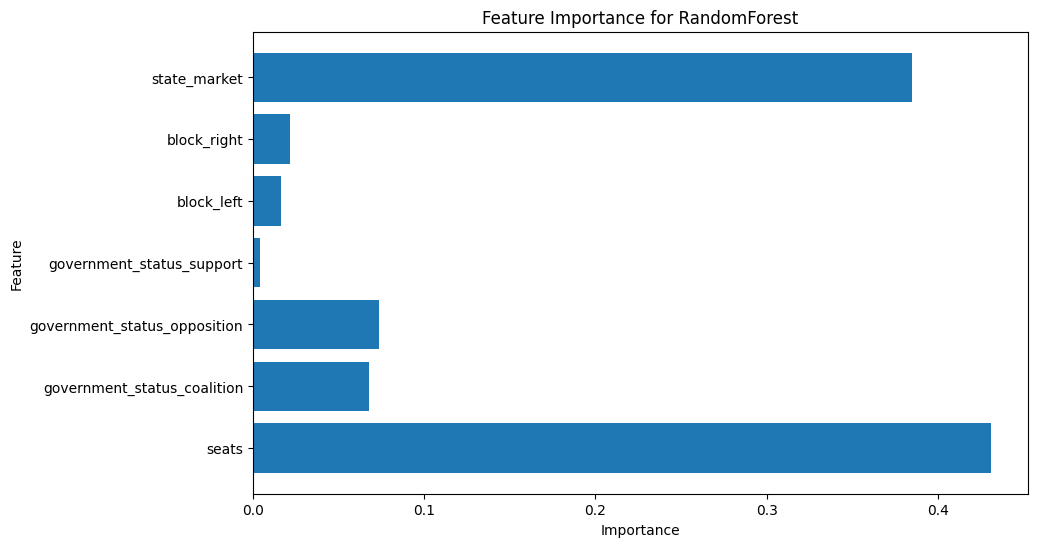

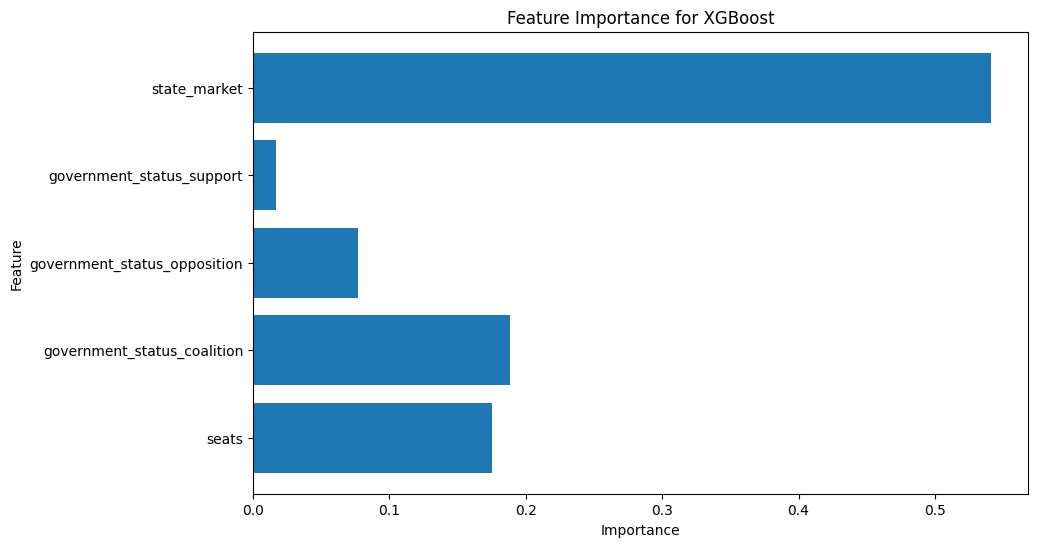

In [42]:
# Get importances directly from the model objects for RF
importances = best_rf_retrained.feature_importances_
feature_names = best_rf_feature_subset

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForest')
plt.show()

# Get importances directly from the model objects for XGB as well
importances = best_xgb_retrained.feature_importances_
feature_names = best_xgb_feature_subset

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBoost')
plt.show()
